# Model Training - Morocco Airbnb Price Prediction

**Dataset**: `morocco_listings_engineered.csv` (65,988 listings, 44 features)

**Objective**: Train and evaluate regression models to predict nightly Airbnb prices

## 🎯 Modeling Strategy

### Models to Train:
1. **Linear Regression** - Baseline interpretable model
2. **Random Forest** - Ensemble method, handles non-linearity
3. **XGBoost** - Gradient boosting, typically best performance

### Evaluation Metrics:
- **MAE** (Mean Absolute Error) - Average prediction error in MAD
- **RMSE** (Root Mean Squared Error) - Penalizes large errors
- **R²** (Coefficient of Determination) - Variance explained
- **MAPE** (Mean Absolute Percentage Error) - Relative error

### Training Approach:
- 80-20 train-test split
- Cross-validation for hyperparameter tuning
- Feature importance analysis
- Model comparison and selection

## 1. Setup & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# XGBoost
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("⚠️  XGBoost not installed. Will skip XGBoost models.")

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Configure display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Paths
ROOT = Path('/home/medgm/vsc/dApp-Ai')
DATA_PATH = ROOT / 'data' / 'used_or_will_be_used' / 'morocco_listings_engineered.csv'
MODEL_OUTPUT_PATH = ROOT / 'models'
MODEL_OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

print("🤖 Model Training Pipeline")
print("=" * 70)

🤖 Model Training Pipeline


In [2]:
# Load engineered dataset
df = pd.read_csv(DATA_PATH)

print(f"✓ Loaded engineered dataset: {len(df):,} listings")
print(f"✓ Features: {len(df.columns) - 1} (excluding target)")
print(f"\nDataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

df.head(3)

✓ Loaded engineered dataset: 65,988 listings
✓ Features: 44 (excluding target)

Dataset shape: (65988, 45)
Memory usage: 10.76 MB


,latitude,longitude,stay_length_nights,nightly_price,discount_rate,bedroom_count,bed_count,rating_value,rating_count,badge_count,is_superhost,image_count,beds_per_bedroom,city_tier,is_peak_season,is_long_stay,has_high_rating,is_luxury,total_capacity,city_Al Hoceima,city_Casablanca,city_Chefchaouen,city_Essaouira,city_Fes,city_Marrakech,city_Meknes,city_Ouarzazate,city_Oujda,city_Rabat,city_Tangier,city_Tétouan,season_spring,season_summer,season_winter,room_type_Private room,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Condominium,property_type_House,property_type_Loft,property_type_Other,property_type_Villa,size_category_Small,size_category_Medium,size_category_Large
0,35.2372,-3.9573,7,413.2900,0.8071,1,2,4.9300,116,1,False,6,2.0000,2,1,0,1,0,3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,35.2287,-3.9228,7,450.8600,0.9113,2,3,0.0000,0,1,True,6,1.5000,2,1,0,0,0,5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,35.2428,-3.9499,7,913.0000,0.0000,3,7,5.0000,16,1,False,6,2.3333,2,1,0,1,1,10,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True


## 2. Prepare Train-Test Split

In [3]:
print("\n🔀 Splitting Data (80-20 Train-Test)")
print("=" * 70)

# Separate features and target
X = df.drop('nightly_price', axis=1)
y = df['nightly_price']

print(f"\nFeature matrix X: {X.shape}")
print(f"Target vector y: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✓ Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"✓ Test set:     {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nTarget statistics:")
print(f"  Train mean: {y_train.mean():.2f} MAD")
print(f"  Test mean:  {y_test.mean():.2f} MAD")
print(f"  Train std:  {y_train.std():.2f} MAD")
print(f"  Test std:   {y_test.std():.2f} MAD")


🔀 Splitting Data (80-20 Train-Test)

Feature matrix X: (65988, 44)
Target vector y: (65988,)

✓ Training set: 52,790 samples (80.0%)
✓ Test set:     13,198 samples (20.0%)

Target statistics:
  Train mean: 597.26 MAD
  Test mean:  604.88 MAD
  Train std:  455.70 MAD
  Test std:   458.09 MAD


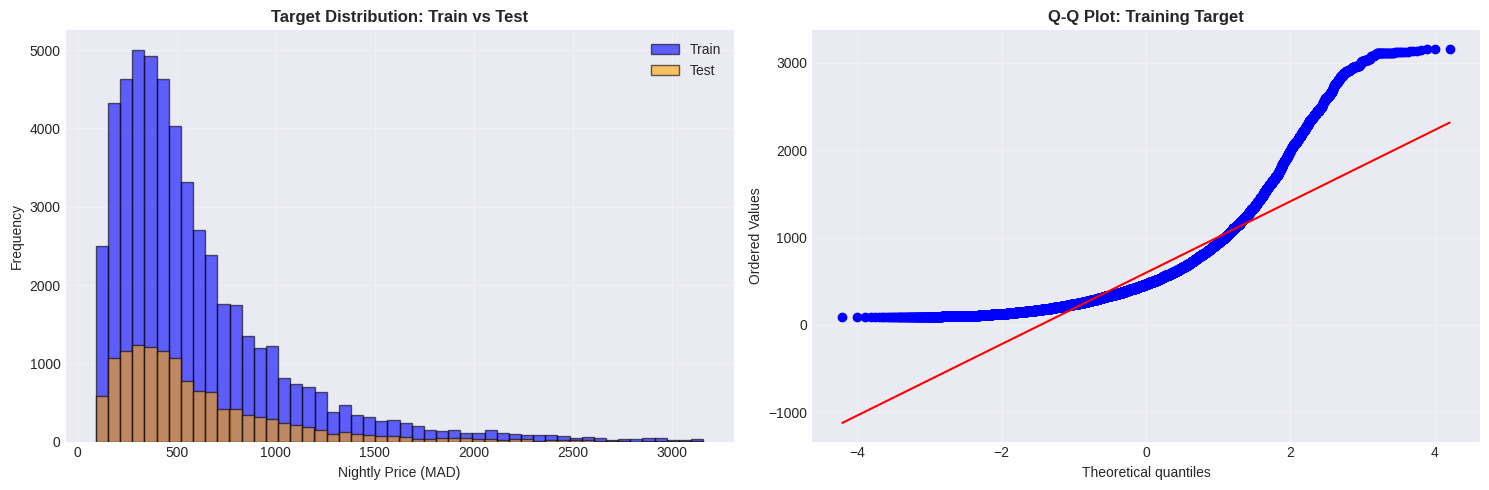

✅ Train-test split verified: distributions are balanced


In [4]:
# Verify feature distribution between train and test
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Target distribution
axes[0].hist(y_train, bins=50, alpha=0.6, label='Train', color='blue', edgecolor='black')
axes[0].hist(y_test, bins=50, alpha=0.6, label='Test', color='orange', edgecolor='black')
axes[0].set_xlabel('Nightly Price (MAD)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Target Distribution: Train vs Test', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(y_train, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Training Target', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Train-test split verified: distributions are balanced")

## 3. Model Training & Evaluation

In [5]:
# Helper functions for evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train model and evaluate on train/test sets
    """
    # Train
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    metrics = {
        'model': model_name,
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'test_mae': mean_absolute_error(y_test, y_test_pred),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred),
        'train_mape': np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100,
        'test_mape': np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    }
    
    return model, metrics, y_test_pred

def print_metrics(metrics):
    """
    Pretty print model metrics
    """
    print(f"\n{'='*70}")
    print(f"📊 {metrics['model']} Performance")
    print(f"{'='*70}")
    print(f"\n{'Metric':<20} {'Train':<15} {'Test':<15} {'Overfit':<10}")
    print(f"{'-'*60}")
    
    mae_overfit = ((metrics['test_mae'] - metrics['train_mae']) / metrics['train_mae']) * 100
    print(f"{'MAE (MAD)':<20} {metrics['train_mae']:<15.2f} {metrics['test_mae']:<15.2f} {mae_overfit:>9.1f}%")
    
    rmse_overfit = ((metrics['test_rmse'] - metrics['train_rmse']) / metrics['train_rmse']) * 100
    print(f"{'RMSE (MAD)':<20} {metrics['train_rmse']:<15.2f} {metrics['test_rmse']:<15.2f} {rmse_overfit:>9.1f}%")
    
    r2_diff = (metrics['train_r2'] - metrics['test_r2']) * 100
    print(f"{'R² Score':<20} {metrics['train_r2']:<15.4f} {metrics['test_r2']:<15.4f} {r2_diff:>9.1f}%")
    
    print(f"{'MAPE (%)':<20} {metrics['train_mape']:<15.2f} {metrics['test_mape']:<15.2f}")
    
    print(f"\n✅ Model explains {metrics['test_r2']*100:.2f}% of price variance")
    print(f"✅ Average prediction error: ±{metrics['test_mae']:.2f} MAD")

# Dictionary to store all results
all_models = {}
all_metrics = []
all_predictions = {}

print("\n🚀 Training Models...")
print("=" * 70)


🚀 Training Models...


### 3.1 Linear Regression (Baseline)

In [6]:
print("\n1️⃣ Training Linear Regression...")

lr_model = LinearRegression()
lr_model, lr_metrics, lr_pred = evaluate_model(
    lr_model, X_train, X_test, y_train, y_test, 'Linear Regression'
)

all_models['Linear Regression'] = lr_model
all_metrics.append(lr_metrics)
all_predictions['Linear Regression'] = lr_pred

print_metrics(lr_metrics)


1️⃣ Training Linear Regression...

📊 Linear Regression Performance

Metric               Train           Test            Overfit   
------------------------------------------------------------
MAE (MAD)            234.79          237.51                1.2%
RMSE (MAD)           348.90          351.24                0.7%
R² Score             0.4138          0.4120                0.2%
MAPE (%)             50.00           49.70          

✅ Model explains 41.20% of price variance
✅ Average prediction error: ±237.51 MAD

📊 Linear Regression Performance

Metric               Train           Test            Overfit   
------------------------------------------------------------
MAE (MAD)            234.79          237.51                1.2%
RMSE (MAD)           348.90          351.24                0.7%
R² Score             0.4138          0.4120                0.2%
MAPE (%)             50.00           49.70          

✅ Model explains 41.20% of price variance
✅ Average prediction error: ±23

### 3.2 Ridge Regression (L2 Regularization)

In [7]:
print("\n2️⃣ Training Ridge Regression...")

ridge_model = Ridge(alpha=10.0, random_state=42)
ridge_model, ridge_metrics, ridge_pred = evaluate_model(
    ridge_model, X_train, X_test, y_train, y_test, 'Ridge Regression'
)

all_models['Ridge Regression'] = ridge_model
all_metrics.append(ridge_metrics)
all_predictions['Ridge Regression'] = ridge_pred

print_metrics(ridge_metrics)


2️⃣ Training Ridge Regression...

📊 Ridge Regression Performance

Metric               Train           Test            Overfit   
------------------------------------------------------------
MAE (MAD)            235.39          238.26                1.2%
RMSE (MAD)           349.36          352.00                0.8%
R² Score             0.4122          0.4095                0.3%
MAPE (%)             50.11           49.89          

✅ Model explains 40.95% of price variance
✅ Average prediction error: ±238.26 MAD


### 3.3 Random Forest

In [8]:
print("\n3️⃣ Training Random Forest...")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_model, rf_metrics, rf_pred = evaluate_model(
    rf_model, X_train, X_test, y_train, y_test, 'Random Forest'
)

all_models['Random Forest'] = rf_model
all_metrics.append(rf_metrics)
all_predictions['Random Forest'] = rf_pred

print_metrics(rf_metrics)


3️⃣ Training Random Forest...

📊 Random Forest Performance

Metric               Train           Test            Overfit   
------------------------------------------------------------
MAE (MAD)            48.55           84.59                74.2%
RMSE (MAD)           95.82           172.22               79.7%
R² Score             0.9558          0.8586                9.7%
MAPE (%)             8.84            14.58          

✅ Model explains 85.86% of price variance
✅ Average prediction error: ±84.59 MAD

📊 Random Forest Performance

Metric               Train           Test            Overfit   
------------------------------------------------------------
MAE (MAD)            48.55           84.59                74.2%
RMSE (MAD)           95.82           172.22               79.7%
R² Score             0.9558          0.8586                9.7%
MAPE (%)             8.84            14.58          

✅ Model explains 85.86% of price variance
✅ Average prediction error: ±84.59 MAD


### 3.4 XGBoost

In [9]:
if XGBOOST_AVAILABLE:
    print("\n4️⃣ Training XGBoost...")
    
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    
    xgb_model, xgb_metrics, xgb_pred = evaluate_model(
        xgb_model, X_train, X_test, y_train, y_test, 'XGBoost'
    )
    
    all_models['XGBoost'] = xgb_model
    all_metrics.append(xgb_metrics)
    all_predictions['XGBoost'] = xgb_pred
    
    print_metrics(xgb_metrics)
else:
    print("\n⚠️  Skipping XGBoost (not installed)")
    print("   To install: pip install xgboost")


4️⃣ Training XGBoost...

📊 XGBoost Performance

Metric               Train           Test            Overfit   
------------------------------------------------------------
MAE (MAD)            143.43          151.78                5.8%
RMSE (MAD)           222.17          237.05                6.7%
R² Score             0.7623          0.7322                3.0%
MAPE (%)             27.94           28.94          

✅ Model explains 73.22% of price variance
✅ Average prediction error: ±151.78 MAD

📊 XGBoost Performance

Metric               Train           Test            Overfit   
------------------------------------------------------------
MAE (MAD)            143.43          151.78                5.8%
RMSE (MAD)           222.17          237.05                6.7%
R² Score             0.7623          0.7322                3.0%
MAPE (%)             27.94           28.94          

✅ Model explains 73.22% of price variance
✅ Average prediction error: ±151.78 MAD


## 4. Model Comparison

In [10]:
# Create comparison DataFrame
comparison_df = pd.DataFrame(all_metrics)

print("\n📊 Model Comparison Summary")
print("=" * 70)
print("\nTest Set Performance:")
print(comparison_df[['model', 'test_mae', 'test_rmse', 'test_r2', 'test_mape']].to_string(index=False))

# Find best model
best_model_idx = comparison_df['test_r2'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'model']
best_r2 = comparison_df.loc[best_model_idx, 'test_r2']
best_mae = comparison_df.loc[best_model_idx, 'test_mae']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   R² Score: {best_r2:.4f}")
print(f"   MAE: {best_mae:.2f} MAD")


📊 Model Comparison Summary

Test Set Performance:
            model  test_mae  test_rmse  test_r2  test_mape
Linear Regression  237.5131   351.2438   0.4120    49.6955
 Ridge Regression  238.2643   352.0012   0.4095    49.8867
    Random Forest   84.5939   172.2231   0.8586    14.5806
          XGBoost  151.7775   237.0450   0.7322    28.9363

🏆 Best Model: Random Forest
   R² Score: 0.8586
   MAE: 84.59 MAD


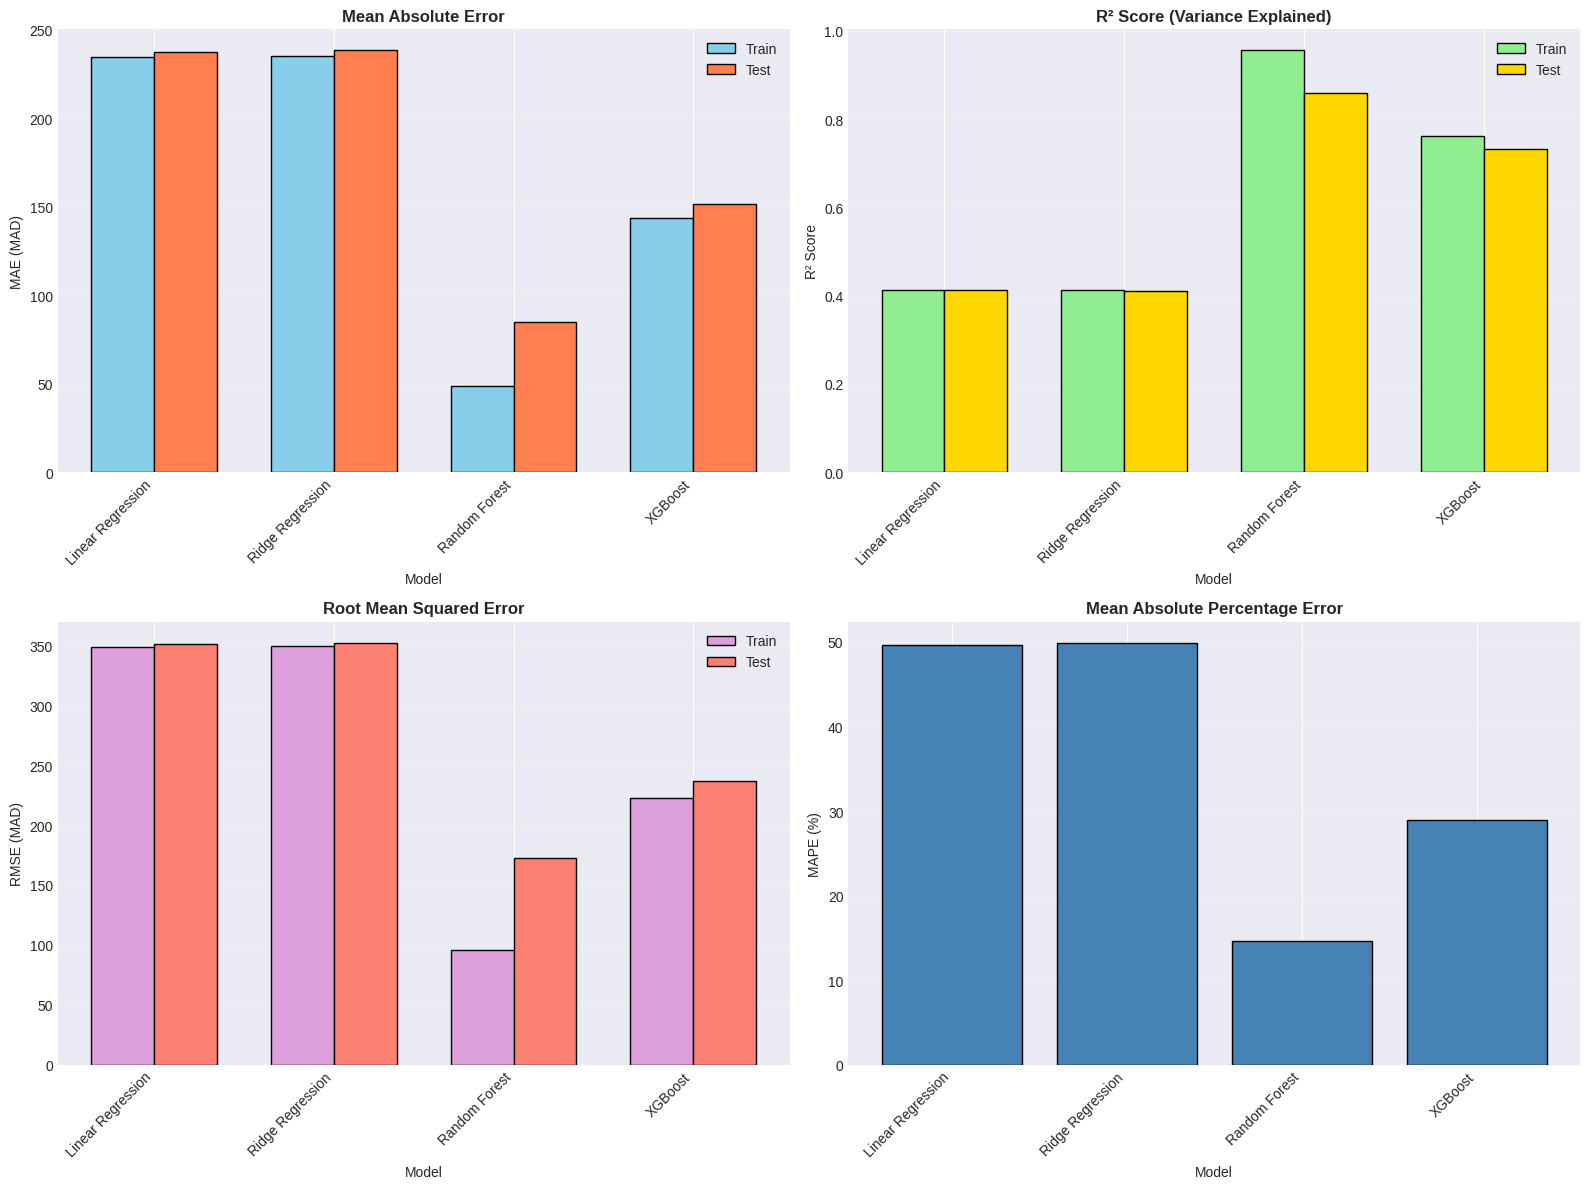

In [11]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. MAE comparison
models = comparison_df['model'].tolist()
train_mae = comparison_df['train_mae'].tolist()
test_mae = comparison_df['test_mae'].tolist()

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, train_mae, width, label='Train', color='skyblue', edgecolor='black')
axes[0, 0].bar(x + width/2, test_mae, width, label='Test', color='coral', edgecolor='black')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('MAE (MAD)')
axes[0, 0].set_title('Mean Absolute Error', fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3, axis='y')

# 2. R² comparison
train_r2 = comparison_df['train_r2'].tolist()
test_r2 = comparison_df['test_r2'].tolist()

axes[0, 1].bar(x - width/2, train_r2, width, label='Train', color='lightgreen', edgecolor='black')
axes[0, 1].bar(x + width/2, test_r2, width, label='Test', color='gold', edgecolor='black')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('R² Score (Variance Explained)', fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. RMSE comparison
train_rmse = comparison_df['train_rmse'].tolist()
test_rmse = comparison_df['test_rmse'].tolist()

axes[1, 0].bar(x - width/2, train_rmse, width, label='Train', color='plum', edgecolor='black')
axes[1, 0].bar(x + width/2, test_rmse, width, label='Test', color='salmon', edgecolor='black')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('RMSE (MAD)')
axes[1, 0].set_title('Root Mean Squared Error', fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. MAPE comparison
test_mape = comparison_df['test_mape'].tolist()

axes[1, 1].bar(models, test_mape, color='steelblue', edgecolor='black')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('MAPE (%)')
axes[1, 1].set_title('Mean Absolute Percentage Error', fontweight='bold')
axes[1, 1].set_xticklabels(models, rotation=45, ha='right')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 5. Prediction Analysis

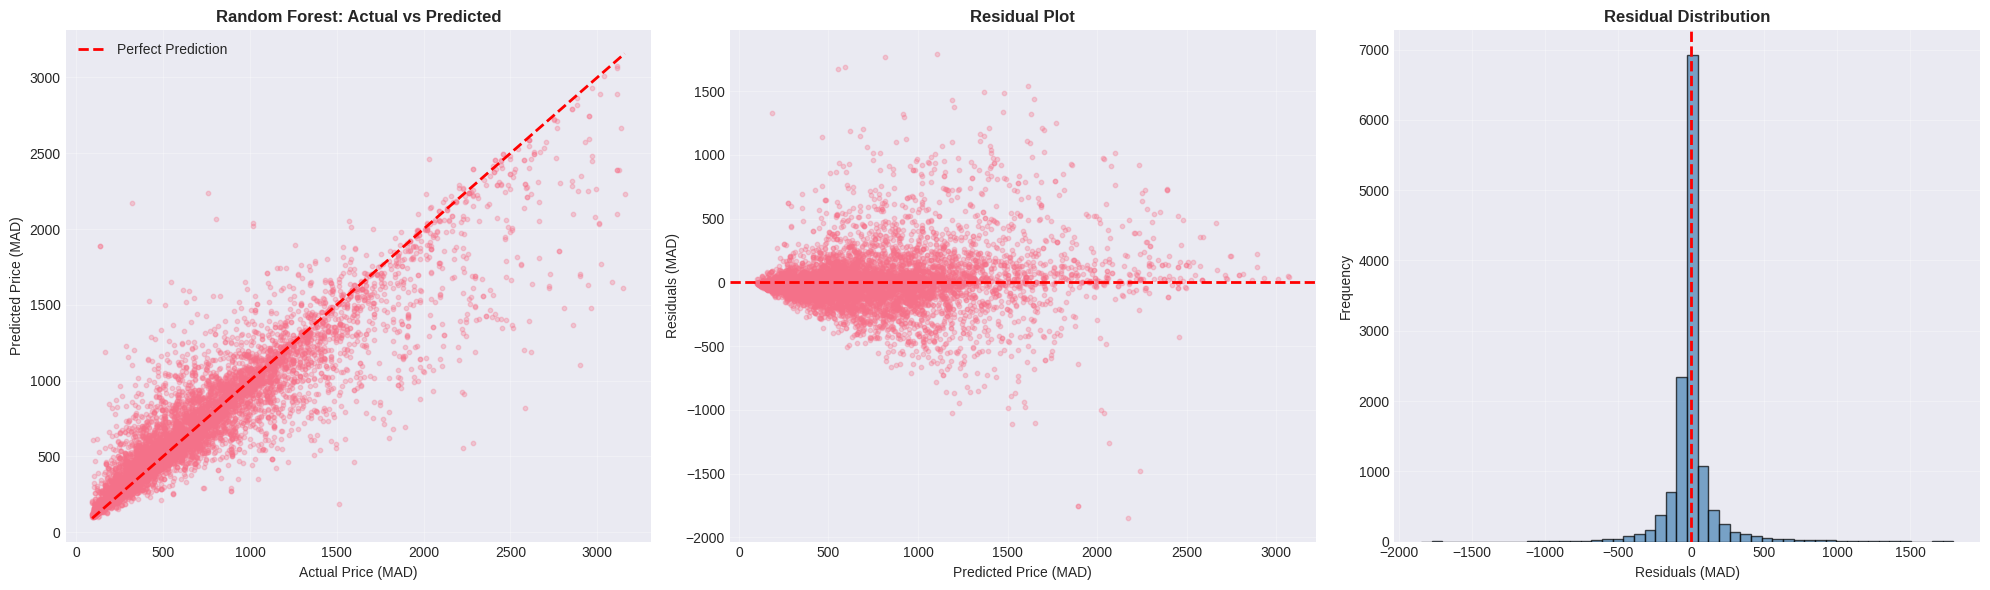


📊 Residual Statistics (Random Forest):
   Mean residual: 2.42 MAD
   Std residual:  172.21 MAD
   Min residual:  -1850.00 MAD
   Max residual:  1794.50 MAD


In [12]:
# Actual vs Predicted for best model
best_pred = all_predictions[best_model_name]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Scatter plot: Actual vs Predicted
axes[0].scatter(y_test, best_pred, alpha=0.3, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price (MAD)')
axes[0].set_ylabel('Predicted Price (MAD)')
axes[0].set_title(f'{best_model_name}: Actual vs Predicted', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2. Residuals plot
residuals = y_test - best_pred
axes[1].scatter(best_pred, residuals, alpha=0.3, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Price (MAD)')
axes[1].set_ylabel('Residuals (MAD)')
axes[1].set_title('Residual Plot', fontweight='bold')
axes[1].grid(alpha=0.3)

# 3. Residuals distribution
axes[2].hist(residuals, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[2].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[2].set_xlabel('Residuals (MAD)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Residual Distribution', fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Residual Statistics ({best_model_name}):")
print(f"   Mean residual: {residuals.mean():.2f} MAD")
print(f"   Std residual:  {residuals.std():.2f} MAD")
print(f"   Min residual:  {residuals.min():.2f} MAD")
print(f"   Max residual:  {residuals.max():.2f} MAD")

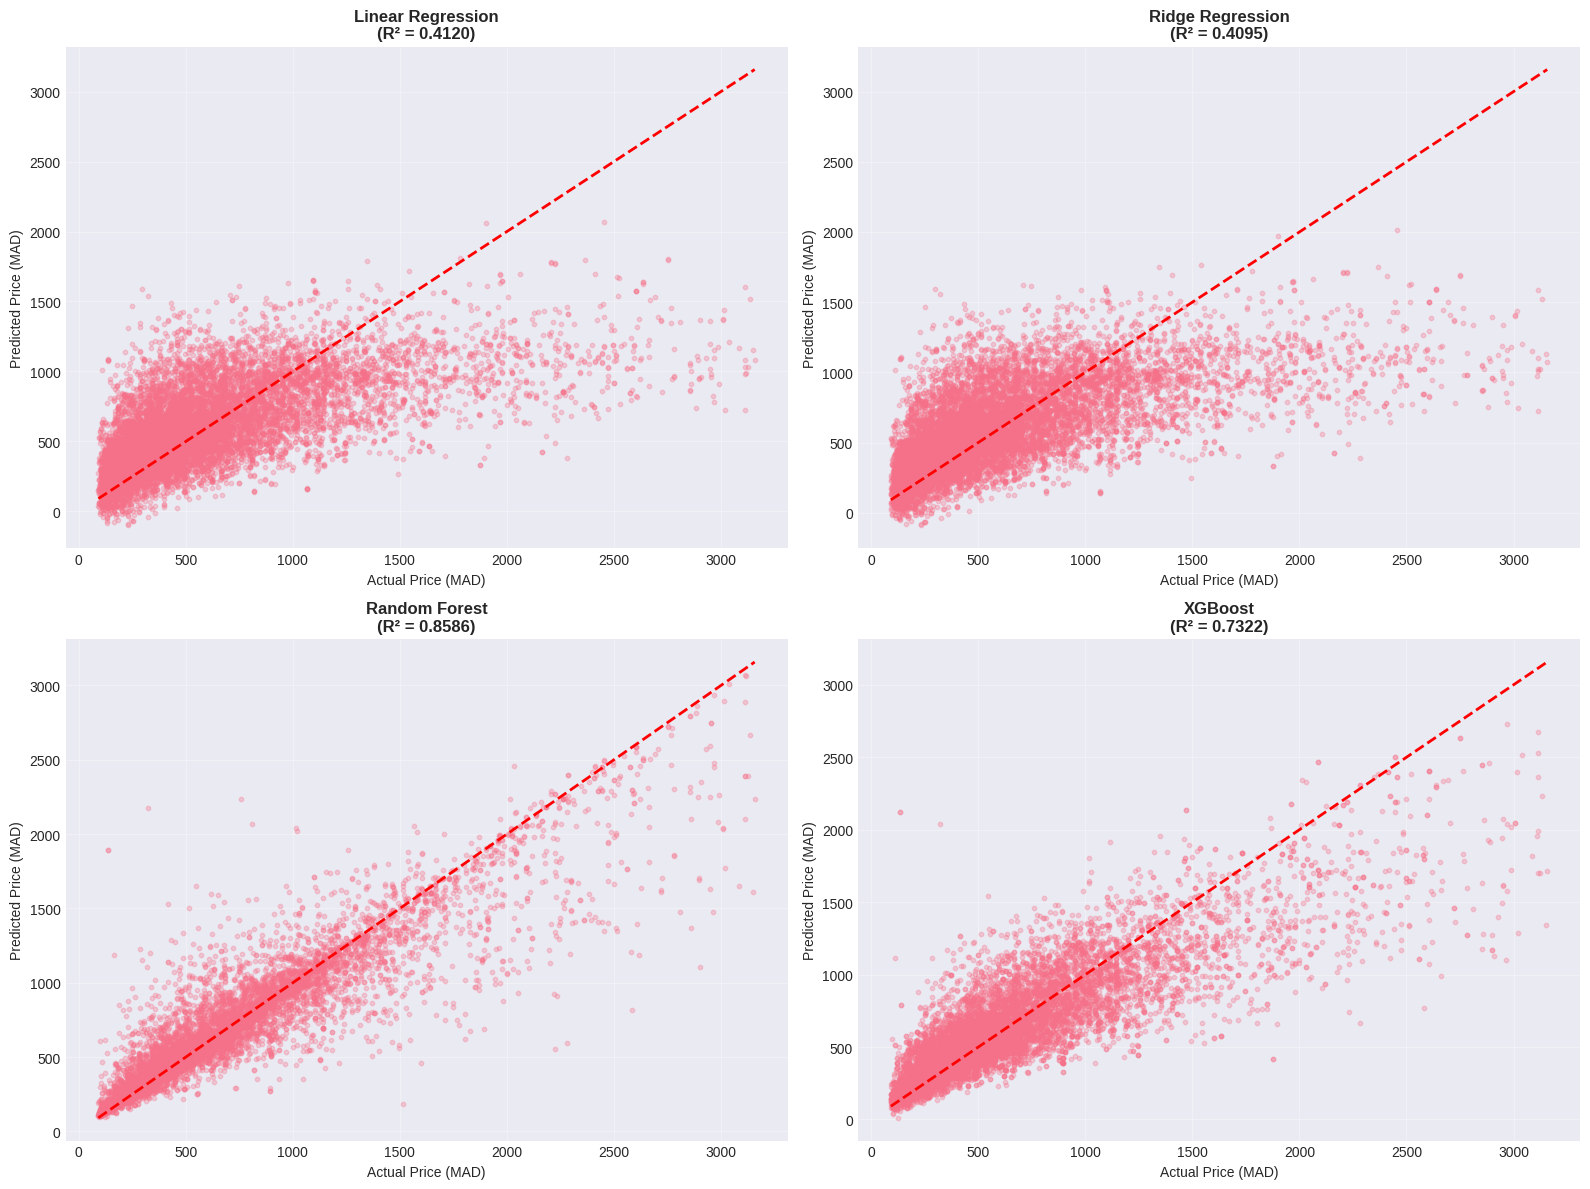

In [13]:
# Compare all model predictions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (model_name, predictions) in enumerate(all_predictions.items()):
    if idx < 4:  # Only plot first 4 models
        axes[idx].scatter(y_test, predictions, alpha=0.3, s=10)
        axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                       'r--', linewidth=2)
        axes[idx].set_xlabel('Actual Price (MAD)')
        axes[idx].set_ylabel('Predicted Price (MAD)')
        
        # Get R² for this model
        model_r2 = comparison_df[comparison_df['model'] == model_name]['test_r2'].values[0]
        axes[idx].set_title(f'{model_name}\n(R² = {model_r2:.4f})', fontweight='bold')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Feature Importance Analysis


🌲 Random Forest - Feature Importance

Top 20 Most Important Features:
             feature  importance
  stay_length_nights      0.2055
           longitude      0.1602
            latitude      0.1100
       bedroom_count      0.0655
           is_luxury      0.0525
        rating_count      0.0469
        rating_value      0.0442
      is_peak_season      0.0408
       discount_rate      0.0383
       season_winter      0.0325
           city_tier      0.0278
        is_long_stay      0.0234
      total_capacity      0.0190
 property_type_Other      0.0176
    beds_per_bedroom      0.0153
 size_category_Large      0.0147
           bed_count      0.0143
size_category_Medium      0.0114
 property_type_House      0.0093
        is_superhost      0.0065


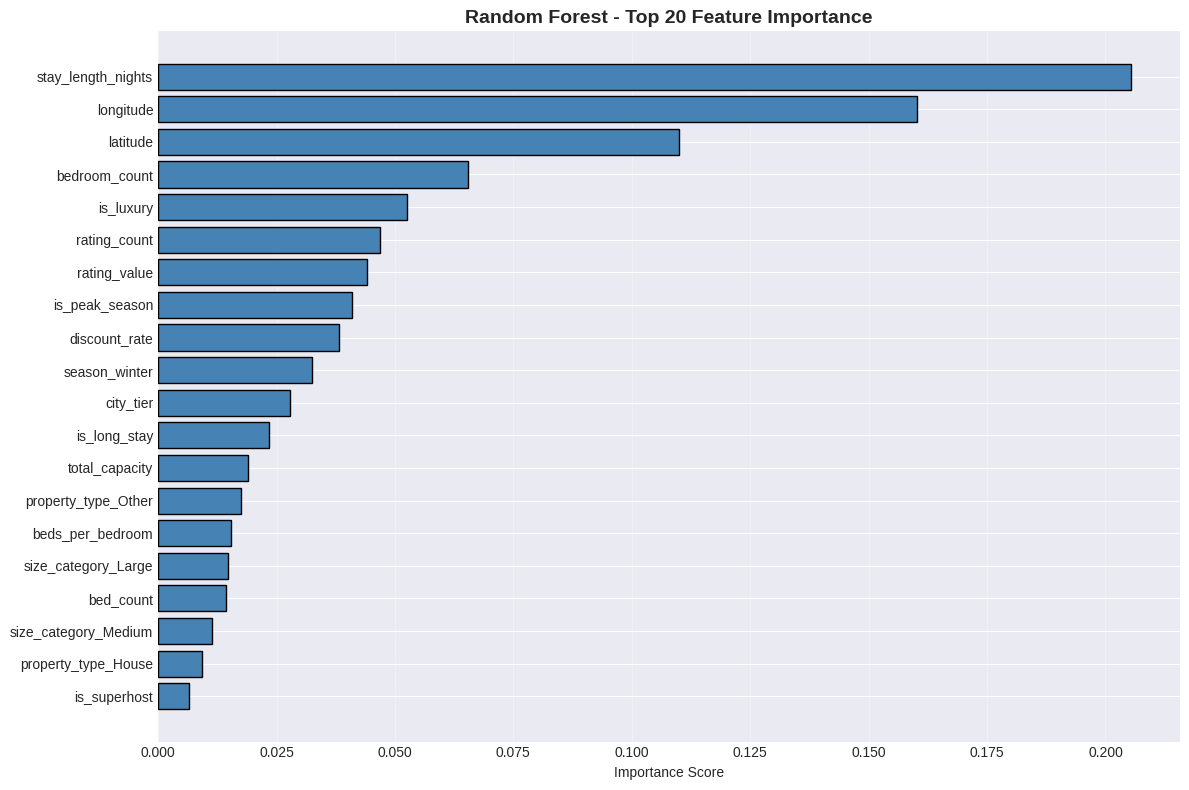

In [14]:
# Feature importance for tree-based models
if 'Random Forest' in all_models:
    print("\n🌲 Random Forest - Feature Importance")
    print("=" * 70)
    
    rf_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': all_models['Random Forest'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 20 Most Important Features:")
    print(rf_importances.head(20).to_string(index=False))
    
    # Visualize top 20 features
    plt.figure(figsize=(12, 8))
    top_features = rf_importances.head(20)
    plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', edgecolor='black')
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importance Score')
    plt.title('Random Forest - Top 20 Feature Importance', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()


⚡ XGBoost - Feature Importance

Top 20 Most Important Features:
               feature  importance
   size_category_Large      0.1787
             is_luxury      0.1277
    stay_length_nights      0.1064
         season_winter      0.0686
        is_peak_season      0.0509
             city_tier      0.0391
          is_long_stay      0.0369
         bedroom_count      0.0305
        city_Marrakech      0.0252
   property_type_Villa      0.0233
            city_Oujda      0.0221
   property_type_Other      0.0209
  size_category_Medium      0.0184
            city_Rabat      0.0184
             longitude      0.0170
       city_Casablanca      0.0169
   property_type_House      0.0147
room_type_Private room      0.0140
       city_Ouarzazate      0.0136
          rating_value      0.0118


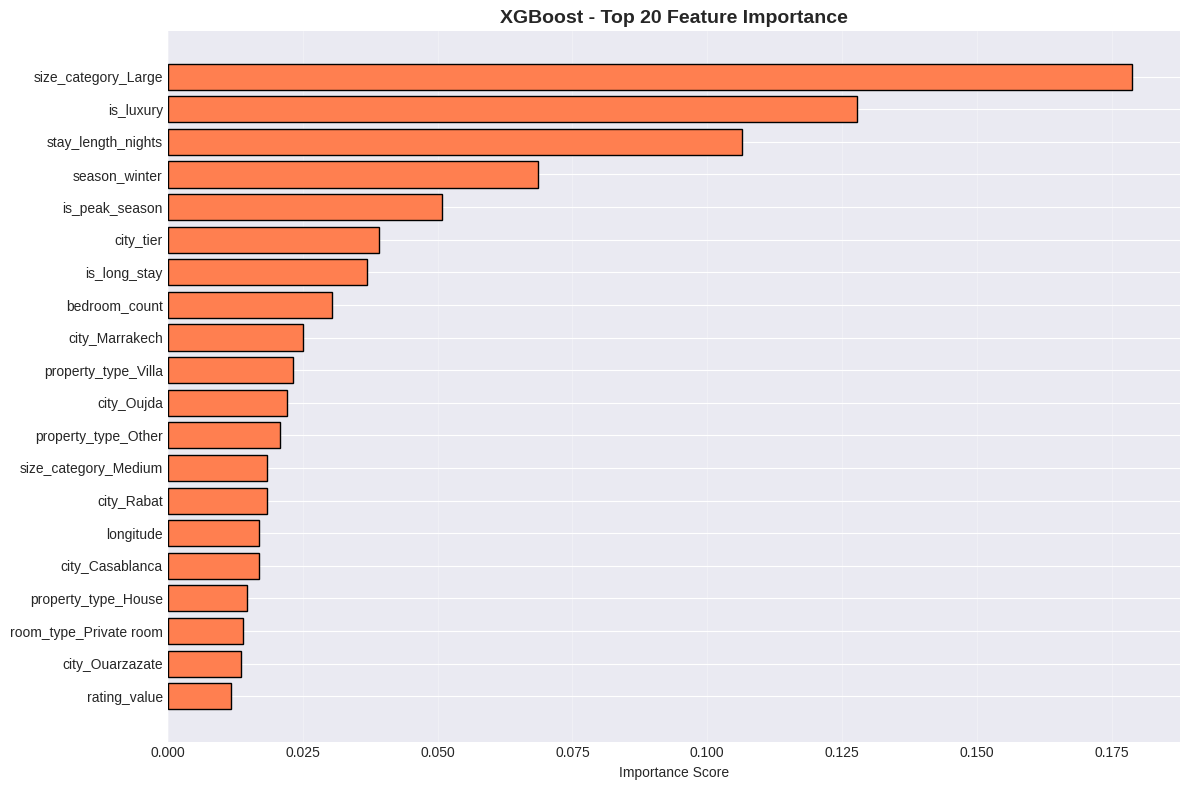

In [15]:
# XGBoost feature importance
if XGBOOST_AVAILABLE and 'XGBoost' in all_models:
    print("\n⚡ XGBoost - Feature Importance")
    print("=" * 70)
    
    xgb_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': all_models['XGBoost'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 20 Most Important Features:")
    print(xgb_importances.head(20).to_string(index=False))
    
    # Visualize top 20 features
    plt.figure(figsize=(12, 8))
    top_features = xgb_importances.head(20)
    plt.barh(range(len(top_features)), top_features['importance'], color='coral', edgecolor='black')
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importance Score')
    plt.title('XGBoost - Top 20 Feature Importance', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

In [16]:
# Linear Regression coefficients
if 'Linear Regression' in all_models:
    print("\n📊 Linear Regression - Top Coefficients")
    print("=" * 70)
    
    lr_coefs = pd.DataFrame({
        'feature': X.columns,
        'coefficient': all_models['Linear Regression'].coef_
    })
    
    # Top positive coefficients
    print("\nTop 10 Positive Coefficients (Increase Price):")
    print(lr_coefs.nlargest(10, 'coefficient').to_string(index=False))
    
    # Top negative coefficients
    print("\nTop 10 Negative Coefficients (Decrease Price):")
    print(lr_coefs.nsmallest(10, 'coefficient').to_string(index=False))


📊 Linear Regression - Top Coefficients

Top 10 Positive Coefficients (Increase Price):
            feature  coefficient
       city_Tangier    7461.8701
         city_Rabat    5172.1156
    city_Al Hoceima    4524.1240
          city_tier    3291.7639
           city_Fes    2744.0160
        city_Meknes    2295.5682
     city_Marrakech    2160.9335
         city_Oujda    1666.2878
    city_Casablanca     982.0557
size_category_Large     851.5485

Top 10 Negative Coefficients (Decrease Price):
                        feature  coefficient
                 city_Essaouira   -5695.1557
                city_Ouarzazate   -1432.8240
                       latitude   -1007.6172
                      longitude    -548.2469
                      is_luxury    -308.7175
             stay_length_nights    -114.7614
         room_type_Private room    -113.2770
property_type_Bed and breakfast     -44.4327
                   is_superhost     -24.4907
                   rating_value     -19.5253


## 7. Error Analysis

In [17]:
# Analyze prediction errors for best model
best_pred = all_predictions[best_model_name]
errors = np.abs(y_test - best_pred)
percentage_errors = (errors / y_test) * 100

# Create error analysis DataFrame
error_df = pd.DataFrame({
    'actual': y_test.values,
    'predicted': best_pred,
    'error': errors,
    'error_pct': percentage_errors
})

print(f"\n🔍 Error Analysis - {best_model_name}")
print("=" * 70)

# Error percentiles
print("\nError Percentiles (MAD):")
for pct in [25, 50, 75, 90, 95, 99]:
    error_value = np.percentile(errors, pct)
    print(f"  {pct}th percentile: {error_value:.2f} MAD")

# Percentage error categories
print("\nPrediction Accuracy Distribution:")
print(f"  Within ±5%:   {(percentage_errors <= 5).sum():,} ({(percentage_errors <= 5).mean()*100:.1f}%)")
print(f"  Within ±10%:  {(percentage_errors <= 10).sum():,} ({(percentage_errors <= 10).mean()*100:.1f}%)")
print(f"  Within ±20%:  {(percentage_errors <= 20).sum():,} ({(percentage_errors <= 20).mean()*100:.1f}%)")
print(f"  Within ±30%:  {(percentage_errors <= 30).sum():,} ({(percentage_errors <= 30).mean()*100:.1f}%)")
print(f"  Above 30%:    {(percentage_errors > 30).sum():,} ({(percentage_errors > 30).mean()*100:.1f}%)")


🔍 Error Analysis - Random Forest

Error Percentiles (MAD):
  25th percentile: 10.03 MAD
  50th percentile: 30.93 MAD
  75th percentile: 88.53 MAD
  90th percentile: 218.26 MAD
  95th percentile: 356.63 MAD
  99th percentile: 771.20 MAD

Prediction Accuracy Distribution:
  Within ±5%:   5,363 (40.6%)
  Within ±10%:  7,887 (59.8%)
  Within ±20%:  10,452 (79.2%)
  Within ±30%:  11,570 (87.7%)
  Above 30%:    1,628 (12.3%)


In [18]:
# Worst predictions
print("\n⚠️  Top 10 Worst Predictions (Largest Errors):")
print("=" * 70)
worst_predictions = error_df.nlargest(10, 'error')
print(worst_predictions.to_string(index=False))

# Best predictions
print("\n✅ Top 10 Best Predictions (Smallest Errors):")
print("=" * 70)
best_predictions = error_df.nsmallest(10, 'error')
print(best_predictions.to_string(index=False))


⚠️  Top 10 Worst Predictions (Largest Errors):
   actual  predicted     error  error_pct
 323.3300  2173.3332 1850.0032   572.1718
2900.3300  1105.8296 1794.5004    61.8723
2584.0000   817.0676 1766.9324    68.3797
 135.2900  1891.2787 1755.9887  1297.9442
 135.2900  1891.2787 1755.9887  1297.9442
2282.4300   591.4800 1690.9500    74.0855
2225.0000   555.1090 1669.8910    75.0513
3149.7100  1613.3664 1536.3436    48.7773
2858.4300  1366.5213 1491.9087    52.1933
2963.0000  1478.2186 1484.7814    50.1107

✅ Top 10 Best Predictions (Smallest Errors):
  actual  predicted  error  error_pct
146.8600   146.8600 0.0000     0.0000
146.8600   146.8600 0.0000     0.0000
146.8600   146.8600 0.0000     0.0000
146.8600   146.8600 0.0000     0.0000
469.5700   469.5700 0.0000     0.0000
185.1400   185.1400 0.0000     0.0000
544.4300   544.4300 0.0000     0.0000
185.1400   185.1400 0.0000     0.0000
469.5700   469.5700 0.0000     0.0000
489.1400   489.1400 0.0000     0.0000


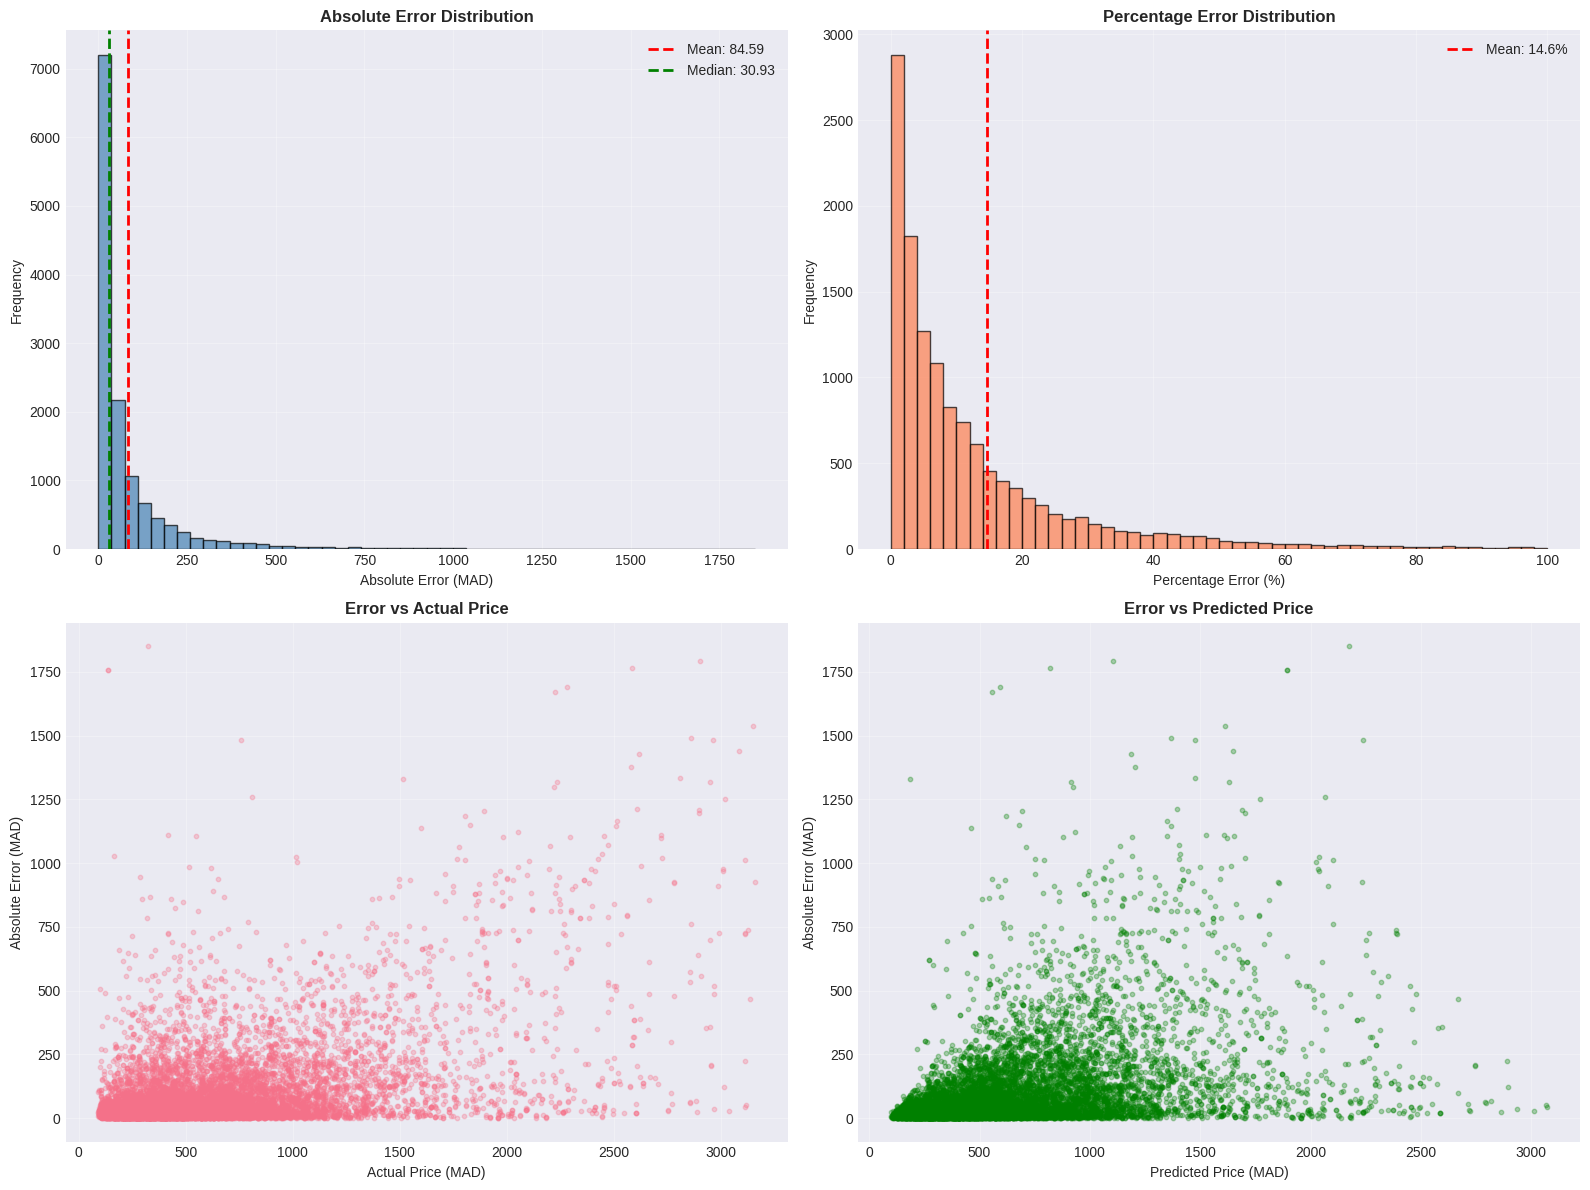

In [19]:
# Error distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Error distribution
axes[0, 0].hist(errors, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=errors.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {errors.mean():.2f}')
axes[0, 0].axvline(x=errors.median(), color='g', linestyle='--', linewidth=2, label=f'Median: {errors.median():.2f}')
axes[0, 0].set_xlabel('Absolute Error (MAD)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Absolute Error Distribution', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Percentage error distribution
axes[0, 1].hist(percentage_errors, bins=50, range=(0, 100), color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=percentage_errors.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {percentage_errors.mean():.1f}%')
axes[0, 1].set_xlabel('Percentage Error (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Percentage Error Distribution', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Error vs Actual Price
axes[1, 0].scatter(y_test, errors, alpha=0.3, s=10)
axes[1, 0].set_xlabel('Actual Price (MAD)')
axes[1, 0].set_ylabel('Absolute Error (MAD)')
axes[1, 0].set_title('Error vs Actual Price', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Error vs Predicted Price
axes[1, 1].scatter(best_pred, errors, alpha=0.3, s=10, color='green')
axes[1, 1].set_xlabel('Predicted Price (MAD)')
axes[1, 1].set_ylabel('Absolute Error (MAD)')
axes[1, 1].set_title('Error vs Predicted Price', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Save Models & Results

In [20]:
import pickle

print("\n💾 Saving Models & Results")
print("=" * 70)

# Save best model
best_model_path = MODEL_OUTPUT_PATH / f'{best_model_name.replace(" ", "_").lower()}_model.pkl'
with open(best_model_path, 'wb') as f:
    pickle.dump(all_models[best_model_name], f)
print(f"\n✓ Best model saved: {best_model_path}")

# Save all models
for model_name, model in all_models.items():
    model_path = MODEL_OUTPUT_PATH / f'{model_name.replace(" ", "_").lower()}_model.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"✓ Saved: {model_path}")

# Save metrics comparison
metrics_path = MODEL_OUTPUT_PATH / 'model_comparison.csv'
comparison_df.to_csv(metrics_path, index=False)
print(f"\n✓ Metrics saved: {metrics_path}")

# Save feature importance (if available)
if 'Random Forest' in all_models:
    rf_importance_path = MODEL_OUTPUT_PATH / 'rf_feature_importance.csv'
    rf_importances.to_csv(rf_importance_path, index=False)
    print(f"✓ RF feature importance saved: {rf_importance_path}")

if XGBOOST_AVAILABLE and 'XGBoost' in all_models:
    xgb_importance_path = MODEL_OUTPUT_PATH / 'xgb_feature_importance.csv'
    xgb_importances.to_csv(xgb_importance_path, index=False)
    print(f"✓ XGBoost feature importance saved: {xgb_importance_path}")


💾 Saving Models & Results

✓ Best model saved: /home/medgm/vsc/dApp-Ai/models/random_forest_model.pkl
✓ Saved: /home/medgm/vsc/dApp-Ai/models/linear_regression_model.pkl
✓ Saved: /home/medgm/vsc/dApp-Ai/models/ridge_regression_model.pkl
✓ Saved: /home/medgm/vsc/dApp-Ai/models/random_forest_model.pkl
✓ Saved: /home/medgm/vsc/dApp-Ai/models/xgboost_model.pkl

✓ Metrics saved: /home/medgm/vsc/dApp-Ai/models/model_comparison.csv
✓ RF feature importance saved: /home/medgm/vsc/dApp-Ai/models/rf_feature_importance.csv
✓ XGBoost feature importance saved: /home/medgm/vsc/dApp-Ai/models/xgb_feature_importance.csv
✓ Saved: /home/medgm/vsc/dApp-Ai/models/random_forest_model.pkl
✓ Saved: /home/medgm/vsc/dApp-Ai/models/xgboost_model.pkl

✓ Metrics saved: /home/medgm/vsc/dApp-Ai/models/model_comparison.csv
✓ RF feature importance saved: /home/medgm/vsc/dApp-Ai/models/rf_feature_importance.csv
✓ XGBoost feature importance saved: /home/medgm/vsc/dApp-Ai/models/xgb_feature_importance.csv


## 9. Model Training Summary

In [22]:
print("\n" + "=" * 70)
print("✅ MODEL TRAINING COMPLETE")
print("=" * 70)

print("\n📊 TRAINING SUMMARY:")
print(f"   Dataset:          {len(df):,} listings")
print(f"   Features:         {len(X.columns)} features")
print(f"   Train set:        {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Test set:         {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"   Models trained:   {len(all_models)}")

print("\n🏆 BEST MODEL:")
print(f"   Model:            {best_model_name}")
print(f"   Test R²:          {best_r2:.4f} ({best_r2*100:.2f}% variance explained)")
print(f"   Test MAE:         {best_mae:.2f} MAD")
print(f"   Test RMSE:        {comparison_df.loc[best_model_idx, 'test_rmse']:.2f} MAD")
print(f"   Test MAPE:        {comparison_df.loc[best_model_idx, 'test_mape']:.2f}%")

print("\n📈 MODEL COMPARISON:")
for _, row in comparison_df.iterrows():
    print(f"   {row['model']:<20s} - R²: {row['test_r2']:.4f}, MAE: {row['test_mae']:.2f} MAD")

print("\n🎯 PREDICTION ACCURACY:")
print(f"   Within ±10%:      {(percentage_errors <= 10).sum():,} listings ({(percentage_errors <= 10).mean()*100:.1f}%)")
print(f"   Within ±20%:      {(percentage_errors <= 20).sum():,} listings ({(percentage_errors <= 20).mean()*100:.1f}%)")
print(f"   Median error:     {errors.median():.2f} MAD")

print("\n💾 SAVED OUTPUTS:")
print(f"   Models directory: {MODEL_OUTPUT_PATH}")
print(f"   Best model:       {best_model_path.name}")
print(f"   Metrics:          model_comparison.csv")
if 'Random Forest' in all_models:
    print(f"   Feature import:   rf_feature_importance.csv")

print("\n🚀 NEXT STEPS:")
print("   1. Hyperparameter tuning (GridSearch/RandomSearch)")
print("   2. Cross-validation for robust evaluation")
print("   3. Model deployment (API endpoint)")
print("   4. A/B testing in production")
print("   5. Monitor model drift and retrain periodically")

print("\n" + "=" * 70)


✅ MODEL TRAINING COMPLETE

📊 TRAINING SUMMARY:
   Dataset:          65,988 listings
   Features:         44 features
   Train set:        52,790 samples (80.0%)
   Test set:         13,198 samples (20.0%)
   Models trained:   4

🏆 BEST MODEL:
   Model:            Random Forest
   Test R²:          0.8586 (85.86% variance explained)
   Test MAE:         84.59 MAD
   Test RMSE:        172.22 MAD
   Test MAPE:        14.58%

📈 MODEL COMPARISON:
   Linear Regression    - R²: 0.4120, MAE: 237.51 MAD
   Ridge Regression     - R²: 0.4095, MAE: 238.26 MAD
   Random Forest        - R²: 0.8586, MAE: 84.59 MAD
   XGBoost              - R²: 0.7322, MAE: 151.78 MAD

🎯 PREDICTION ACCURACY:
   Within ±10%:      7,887 listings (59.8%)
   Within ±20%:      10,452 listings (79.2%)
   Median error:     30.93 MAD

💾 SAVED OUTPUTS:
   Models directory: /home/medgm/vsc/dApp-Ai/models
   Best model:       random_forest_model.pkl
   Metrics:          model_comparison.csv
   Feature import:   rf_feature_impor